In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

(array([  2.,   1.,   2.,   0.,   4.,   1.,   3.,   2.,   3.,   4.,   5.,
          9.,  10.,  11.,  13.,  18.,  19.,  27.,  35.,  38.,  33.,  51.,
         63.,  83.,  66.,  93.,  94., 109., 125., 139., 147., 149., 174.,
        189., 218., 234., 248., 263., 244., 277., 306., 287., 307., 283.,
        350., 304., 275., 302., 332., 302., 337., 289., 275., 271., 261.,
        239., 212., 182., 193., 185., 149., 135., 136., 121., 112.,  92.,
         80.,  69.,  52.,  58.,  48.,  42.,  35.,  38.,  23.,  23.,  14.,
         10.,   7.,  11.,  13.,   4.,   5.,   7.,   6.,   5.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   3.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([-6.22736996, -6.06973889, -5.91210782, -5.75447674, -5.59684567,
        -5.43921459, -5.28158352, -5.12395245, -4.96632137, -4.8086903 ,
        -4.65105922, -4.49342815, -4.33579708, -4.178166  , -4.02053493,
        -3.86290385, -3.70527278, -3.54764171, -3.39001063, -3.23237956,
        -3.07474848, -2.91

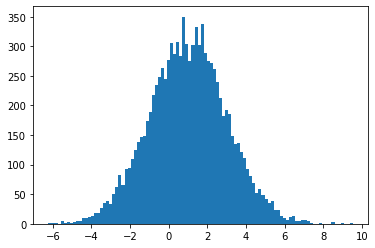

In [ ]:
x = [1] * 10000
x = np.array(x, dtype=np.float64)
noise = sts.norm(0, 2).rvs(10000)
x += noise
plt.hist(x, bins=100)

### 1. Джекпот

Дана выборка "победа-поражение", собранная по одному игровому автомату:

In [ ]:
x = np.load('jackpot.bin')
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Известно, что ставка составляет $s=10$ условных единиц, джекпот (выигрыш в случае победы) составляет $j=900$.

1. Оцените параметр распределения. Приведите свойства полученной оценки
2. Найдите чему равен средний зароботок владельца игрового автомата при условии равенства параметра найденной оценке
3. Игровые аналитики решили проверить гипотезу о том, что аппарат неэффективен, то есть что средняя прибыль ниже нуля. Сформулируйте гипотезу на языке мат. статистики, постройте любой критерий, проверьте гипотезу и найдите вероятность ошибки. В данном случае какого рода данная ошибка?

In [ ]:
n = len(x)
s = 10
j = 900
c = s / j

In [ ]:
p_est = np.mean(x)
print("Estimate of p:", p_est)

Estimate of p: 0.008


In [ ]:
Ei = s - p_est * j
print("Income per play:", Ei)

Income per play: 2.8


In [ ]:
print("Hypothesis rejected:", p_est < s / j)

Hypothesis rejected: True


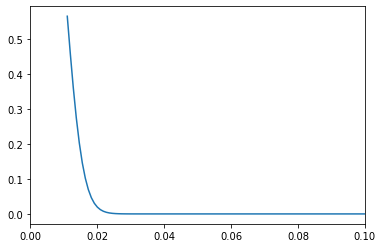

In [ ]:
p = np.linspace(s / j, 0.1, 100)
second_type_error_prob = np.array([sts.binom(p=_p, n=n).cdf(n * s / j) for _p in p])

plt.xlim((0, 0.1))
plt.plot(p, second_type_error_prob)

### 2. Термометр

В зоне стабильного климата в одно и то же время проводятся измерения температуры на некотором термометре в течение $n = 500$ дней. Метеорологи хотят измерить температуру воздуха в данном регионе. Они установили, что $a=10\%$ дней на термометр попадают прямые солнечные лучи, которые нагревают его выше температуры воздуха. 

1. Приведиете оценку максимума распределения температур
2. Графически сравните исходную выборку и отфильтрованную (из которой удалены некачественные измерения). Сделайте вывод - верно ли метеорологи установили процент выбросов в данных?
3. Выберите модель распределения. Приведите оценки параметров и найдите их значения. Какова вероятность появления значений, равных значениям выбросов, при данной величине параметров?

In [ ]:
x = np.load('weather.bin')
x

(array([ 1.,  2.,  2.,  1.,  3.,  4.,  6.,  7.,  9.,  9., 13., 19., 22.,
        27., 23., 24., 24., 29., 29., 25., 22., 29., 25., 26., 15.,  8.,
        12.,  8.,  4.,  5.,  7.,  1.,  2.,  4.,  2.,  2.,  4.,  0.,  7.,
         8., 10.,  3.,  6.,  5.,  4.,  0.,  1.,  0.,  0.,  1.]),
 array([35.40754214, 35.71879958, 36.03005702, 36.34131447, 36.65257191,
        36.96382935, 37.27508679, 37.58634423, 37.89760167, 38.20885911,
        38.52011655, 38.831374  , 39.14263144, 39.45388888, 39.76514632,
        40.07640376, 40.3876612 , 40.69891864, 41.01017608, 41.32143353,
        41.63269097, 41.94394841, 42.25520585, 42.56646329, 42.87772073,
        43.18897817, 43.50023562, 43.81149306, 44.1227505 , 44.43400794,
        44.74526538, 45.05652282, 45.36778026, 45.6790377 , 45.99029515,
        46.30155259, 46.61281003, 46.92406747, 47.23532491, 47.54658235,
        47.85783979, 48.16909724, 48.48035468, 48.79161212, 49.10286956,
        49.414127  , 49.72538444, 50.03664188, 50.34789932,

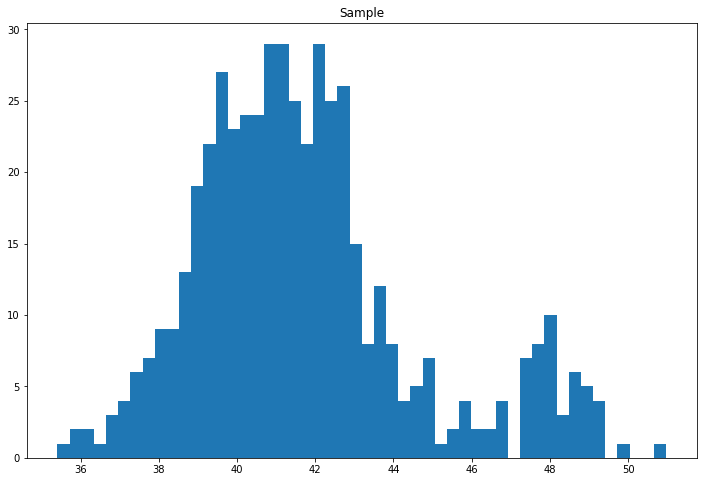

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Sample")
plt.hist(x, bins=50)

In [ ]:
max_estimate = np.quantile(x, q=0.9)
max_estimate

46.42597744410714

(array([ 1.,  2.,  0.,  2.,  1.,  2.,  3.,  2.,  6.,  6.,  7.,  9.,  6.,
        10., 18., 11., 19., 25., 14., 21., 23., 19., 23., 21., 18., 23.,
        15., 24., 17., 23., 16.,  9.,  8., 10.,  8.,  2.,  4.,  3.,  6.,
         4.,  0.,  2.,  3.,  2.,  2.]),
 array([35.40754214, 35.65230694, 35.89707173, 36.14183653, 36.38660132,
        36.63136612, 36.87613092, 37.12089571, 37.36566051, 37.6104253 ,
        37.8551901 , 38.09995489, 38.34471969, 38.58948449, 38.83424928,
        39.07901408, 39.32377887, 39.56854367, 39.81330846, 40.05807326,
        40.30283806, 40.54760285, 40.79236765, 41.03713244, 41.28189724,
        41.52666203, 41.77142683, 42.01619163, 42.26095642, 42.50572122,
        42.75048601, 42.99525081, 43.2400156 , 43.4847804 , 43.7295452 ,
        43.97430999, 44.21907479, 44.46383958, 44.70860438, 44.95336917,
        45.19813397, 45.44289877, 45.68766356, 45.93242836, 46.17719315,
        46.42195795]),
 <BarContainer object of 45 artists>)

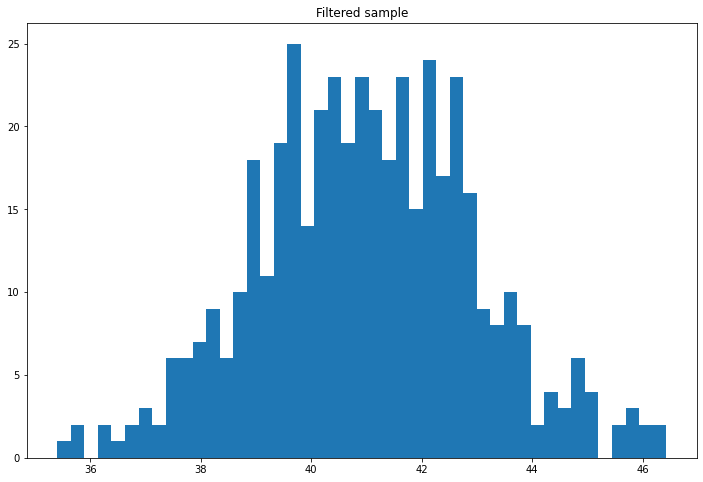

In [ ]:
x_filtered = x[x < max_estimate]
plt.figure(figsize=(12, 8))
plt.title("Filtered sample")
plt.hist(x_filtered, bins=45)

In [ ]:
mu_est = np.mean(x_filtered)
n = len(x_filtered)
s_est = n / (n - 1) * np.mean((x_filtered - mu_est)**2)
print(f"Expected value estimate: {mu_est}, variance estimate: {s_est}")

Expected value estimate: 41.005371991567046, variance estimate: 3.9155788122542474


In [ ]:
p_ext = 1 - sts.norm(mu_est, np.sqrt(s_est)).cdf(max_estimate)
print("Probability for a sample to be in an extremal zone:", p_ext)

Probability for a sample to be in an extremal zone: 0.003077904809936749


### 3. Ширина ворот

Так как уровень спортсменов с каждым годом растёт, международная футбольная ассоциация решила изменить размеры ворот. Теперь ширина ворот будет обоснована не анатомией, а статистикой.

Профессиональных футболистов попросили ударить в центр линии из штрафной зоны. Точки, в которых мяч пересекал линию ворот, представлены в выборке

In [ ]:
x = np.load('football.bin')
plt.scatter(x, [0] * len(x), alpha=0.1)

Новую ширину ворот хотят установить так, чтобы 80% штрафных ударов попадало в створ ворот.

1. Проверьте гипотезу о том, что игроки бьют симметрично от центра с помощью доверительных интервалов. Можно ли, согласно результату проверки гипотезы, устанавливать ворота симметрично? На каком уровне значимости?
2. Попробуйте привести критерий для проверки той же самой гипотезы, основанный на количестве попаданий в левую и праавую части относительно нуля.
3. Подберите ширину ворот так, чтобы удовлетворить требование на попадания. Для этого найдите значение оценки дисперсии. Также постройте доверительный интервал для дисперсии и определите минимальную ширину ворот на уровне доверия 99%. Является ли уточнение статистически значимым?

In [1]:
def criterion(sample, alpha=0.01):
    n = len(sample)
    mean = np.mean(sample)
    s_est = n / (n - 1) * np.mean((sample - mean) ** 2)
    lower = mean - np.sqrt(s_est) / np.sqrt(n) * sts.norm.ppf(1 - alpha / 2) 
    upper = mean - np.sqrt(s_est) / np.sqrt(n) * sts.norm.ppf(alpha / 2) 
    return lower < 0 < upper

In [ ]:
print("Hypothesis rejected:", criterion(x))

In [ ]:
for p_value in np.linspace(0, 1, 1000):
    if criterion(sample=x, alpha=(1 - p_value)):
        print("p value:", p_value)
        break

In [ ]:
def asymetry_criterion(sample, c):
    L = np.sum(sample < 0)
    n = len(sample)
    rejected = (L > (n + c) / 2)
    level = 1 - sts.binom(n, 0.5).cdf((n + c) / 2)
    return rejected, level

In [ ]:
for c in range(20):
    criterion = asymetry_criterion(x, c)
    print("Asymetry hypothesis rejected:", criterion[0], "at level:", criterion[1])

Asymetry hypothesis rejected: False at level: 0.4821676772233252
Asymetry hypothesis rejected: False at level: 0.4821676772233252
Asymetry hypothesis rejected: False at level: 0.4466451218913048
Asymetry hypothesis rejected: False at level: 0.4466451218913048
Asymetry hypothesis rejected: False at level: 0.41154545412275967
Asymetry hypothesis rejected: False at level: 0.41154545412275967
Asymetry hypothesis rejected: False at level: 0.3771394556777047
Asymetry hypothesis rejected: False at level: 0.3771394556777047
Asymetry hypothesis rejected: False at level: 0.34368165404019047
Asymetry hypothesis rejected: False at level: 0.34368165404019047
Asymetry hypothesis rejected: False at level: 0.3114047159898814
Asymetry hypothesis rejected: False at level: 0.3114047159898814
Asymetry hypothesis rejected: False at level: 0.2805146776214231
Asymetry hypothesis rejected: False at level: 0.2805146776214231
Asymetry hypothesis rejected: False at level: 0.2511871703766597
Asymetry hypothesis r

In [ ]:
n = len(x)
sigma2 = n / (n - 1) * np.mean((x - np.mean(x)) ** 2)
z01 = sts.norm(0, np.sqrt(sigma2)).ppf(0.1)
z09 = sts.norm(0, np.sqrt(sigma2)).ppf(0.9)
print("Gate width:", z09 - z01)

Gate width: 7.326719190948797


In [ ]:
alpha = 0.01
z_lower = sts.chi2.ppf(df=n, q=alpha / 2)
z_upper = sts.chi2.ppf(df=n, q=1 - alpha / 2)

In [ ]:
min_sigma2 = np.sum(x ** 2) / z_upper
max_sigma2 = np.sum(x ** 2) / z_lower

In [ ]:
print("Variance:", n / (n - 1) * np.mean((x - np.mean(x)) ** 2))

Variance: 8.171220521923539


In [ ]:
print(f"Variance confidence interval: [{min_sigma2}, {max_sigma2}]")

Variance confidence interval: [1493.9481016364173, 2070.237623031117]
